EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-1024,Sketch:256*256
Execution time: 266.488 seconds.
Precision:  0.921
Top_dict with 138656 bytes.
Sketch with 262272 bytes.
Sk_head with 70360 bytes.
hyperloglog with 4816 bytes.
Total size 464.9453125 kbytes, 
Find:943
Top_ARE: 0.0266
Top_AAE: 170.5748
Estimate time:  0.414 seconds.


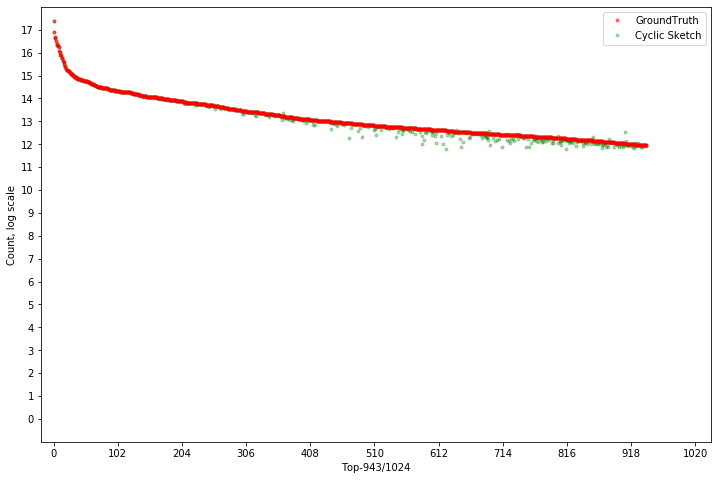

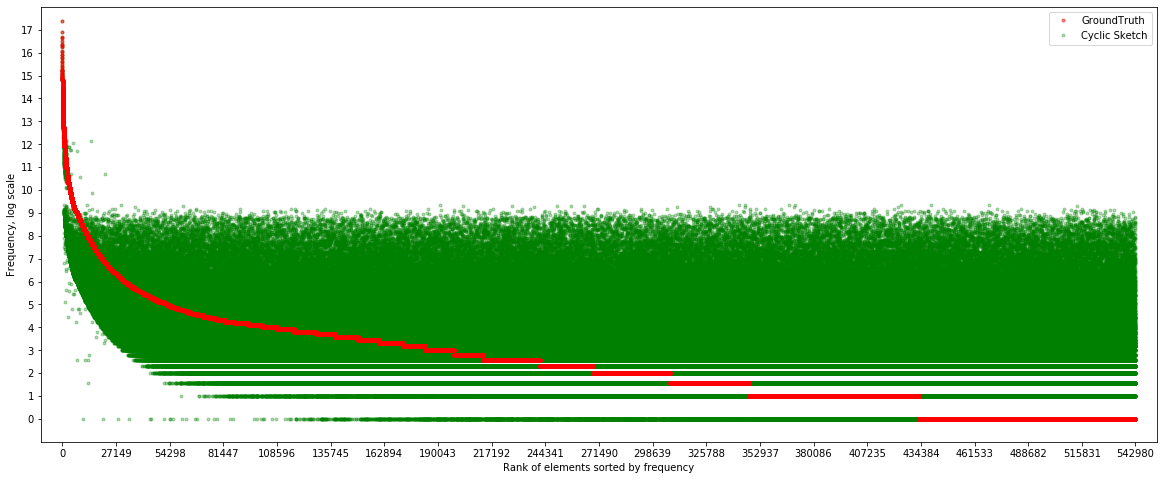

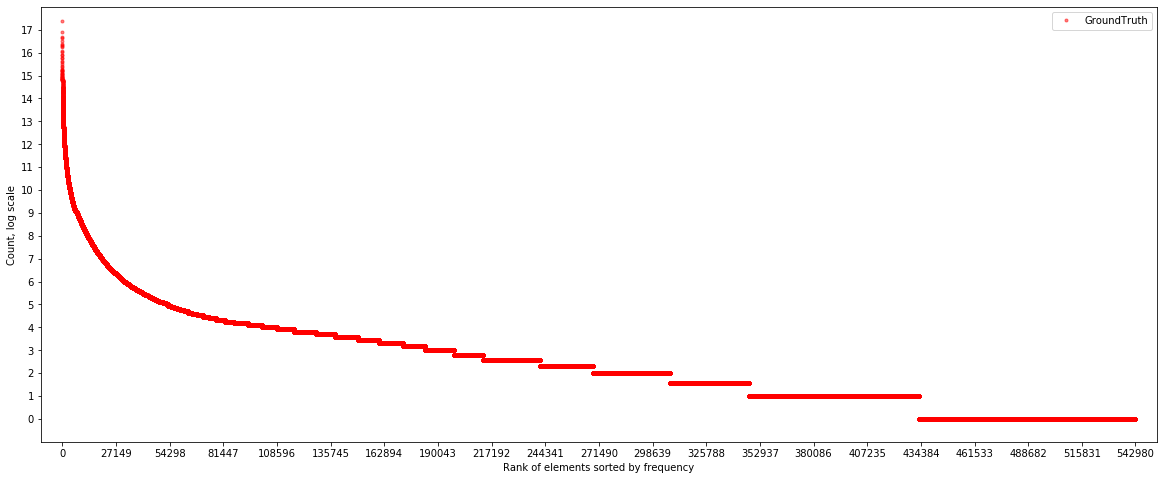

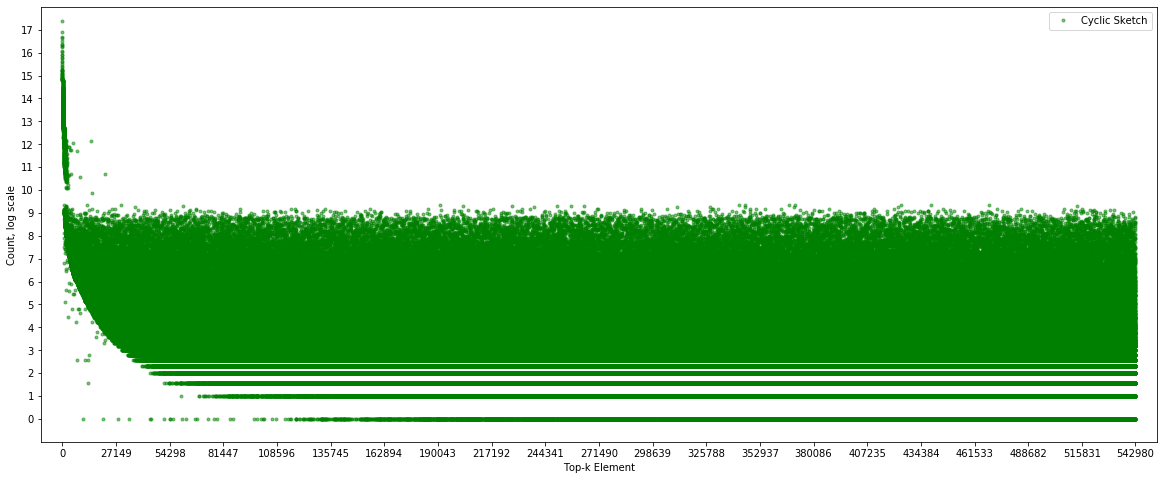

In [9]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=256
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))    



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Top-1024,Sketch:256*256
Execution time: 286.910 seconds.
Precision:  0.926
Top_dict with 138688 bytes.
Sketch with 262272 bytes.
Sk_head with 70264 bytes.
hyperloglog with 4816 bytes.
Total size 464.8828125 kbytes, 
Find:948
Top_ARE: 0.0246
Top_AAE: 157.6361
Estimate time:  0.395 seconds.


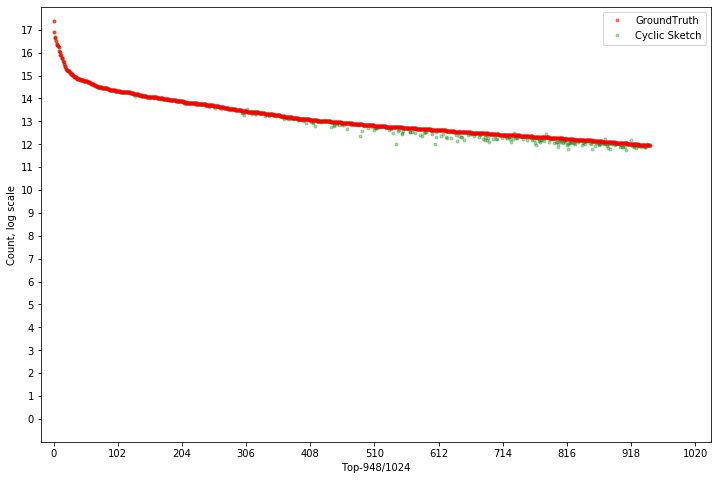

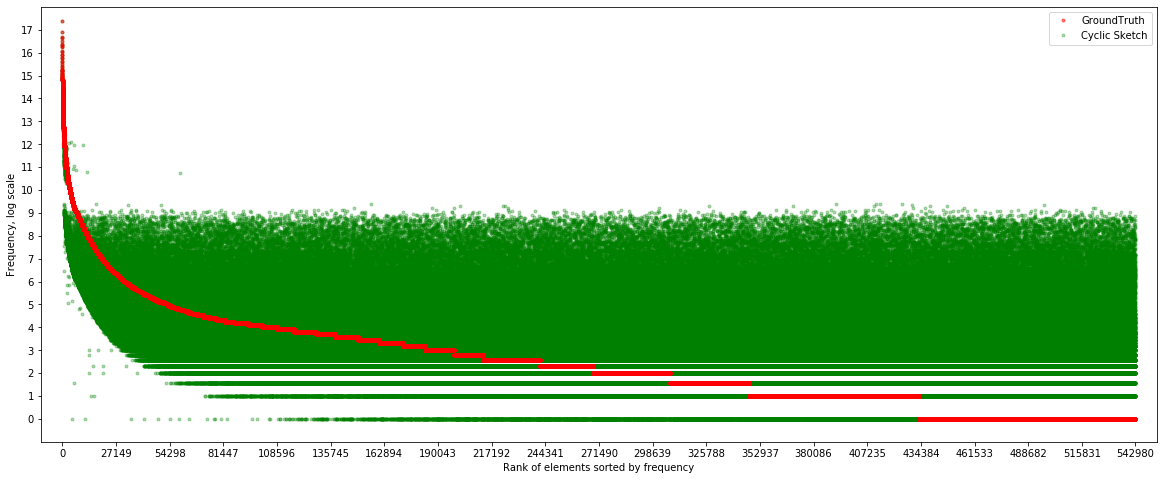

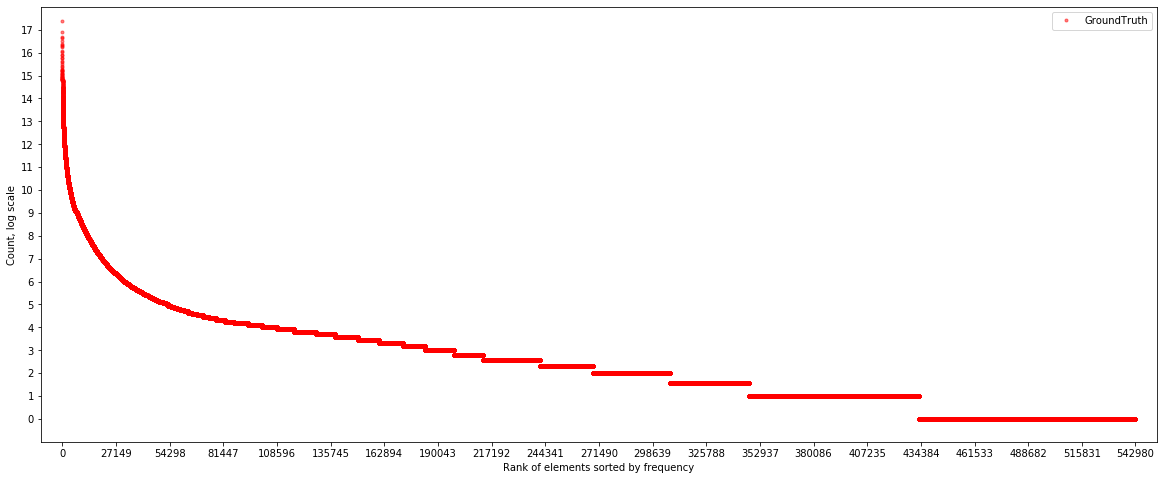

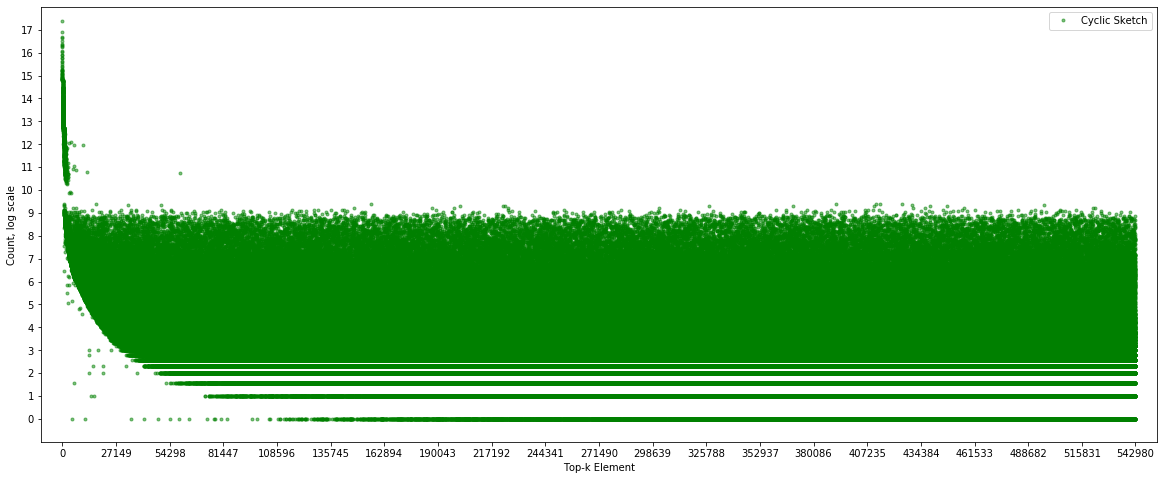

In [10]:
# source ip only
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='caida'
# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=256
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)    
    

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:
                #item_count-=1
                e=str(e[:4])
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
'''    
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))    



EOF
Top-1024,Sketch:256*256
Execution time: 159.233 seconds.
Precision:  0.964
Top_dict with 127080 bytes.
Sketch with 262272 bytes.
Sk_head with 67720 bytes.
hyperloglog with 4848 bytes.
Total size 451.09375 kbytes, 
Find:987
Top_ARE: 0.0033
Top_AAE: 13.3880
Estimate time:  0.579 seconds.


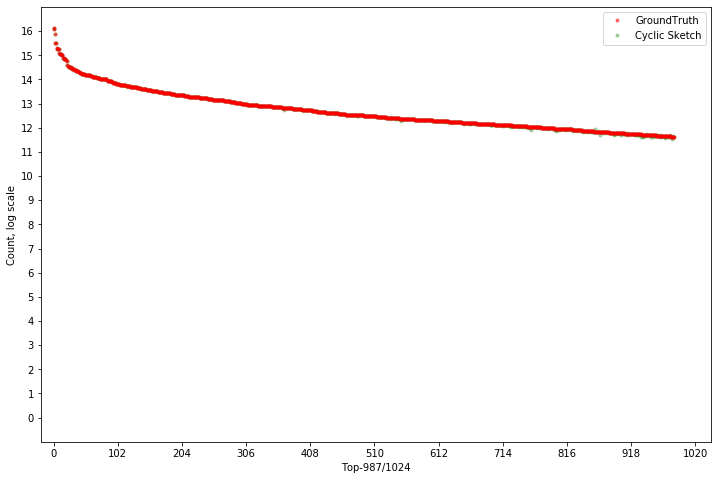

KeyboardInterrupt: 

In [12]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='webdocs'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\webdocs"
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=256
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:
                #item_count-=1
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))       
'''    

EOF
Top-1024,Sketch:256*256
Execution time: 126.680 seconds.
Precision:  0.968
Top_dict with 127080 bytes.
Sketch with 262272 bytes.
Sk_head with 67848 bytes.
hyperloglog with 4848 bytes.
Total size 451.21875 kbytes, 
Find:991
Top_ARE: 0.0040
Top_AAE: 15.9849
Estimate time:  0.460 seconds.


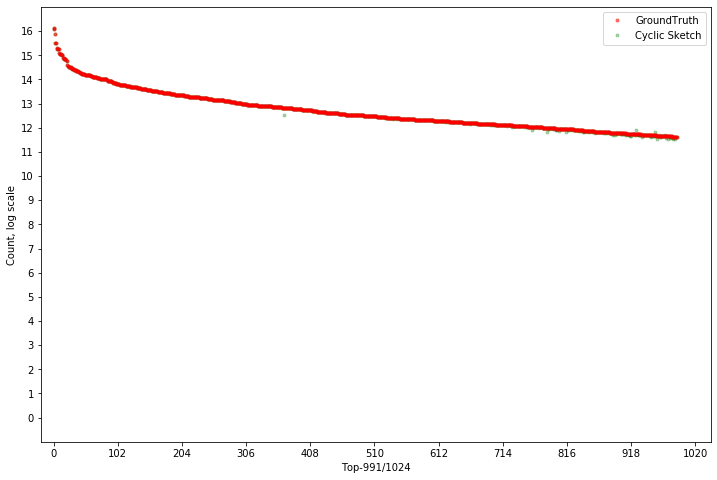

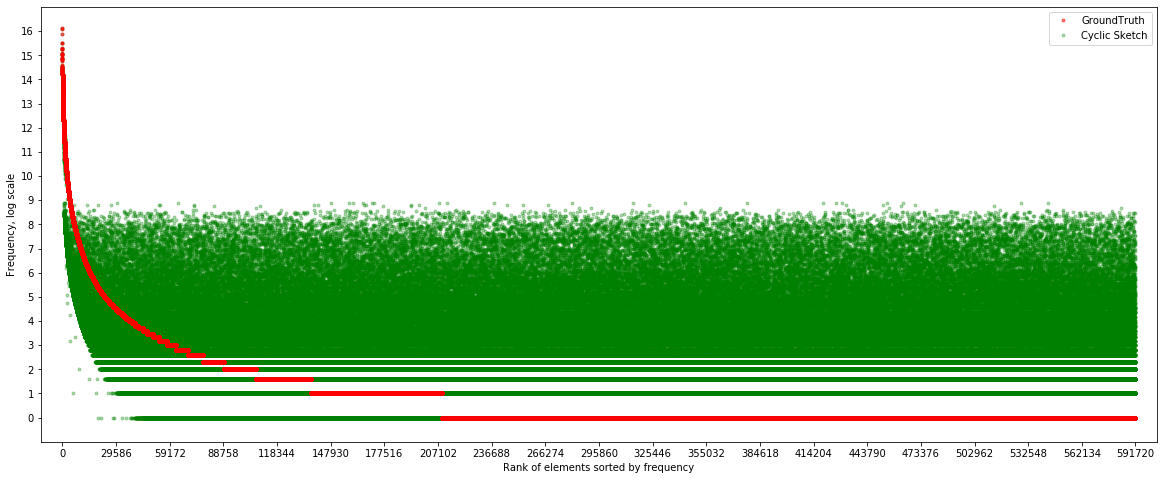

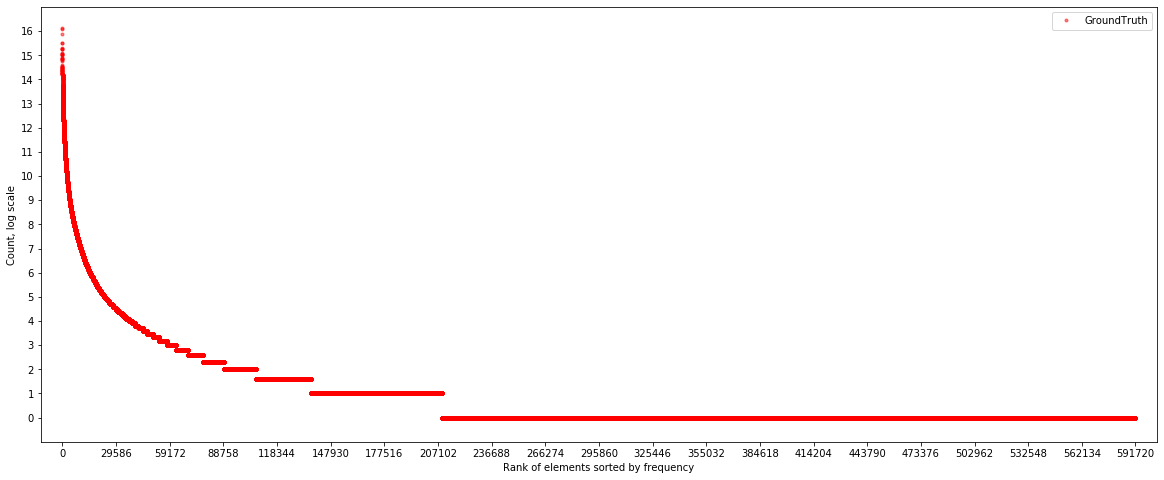

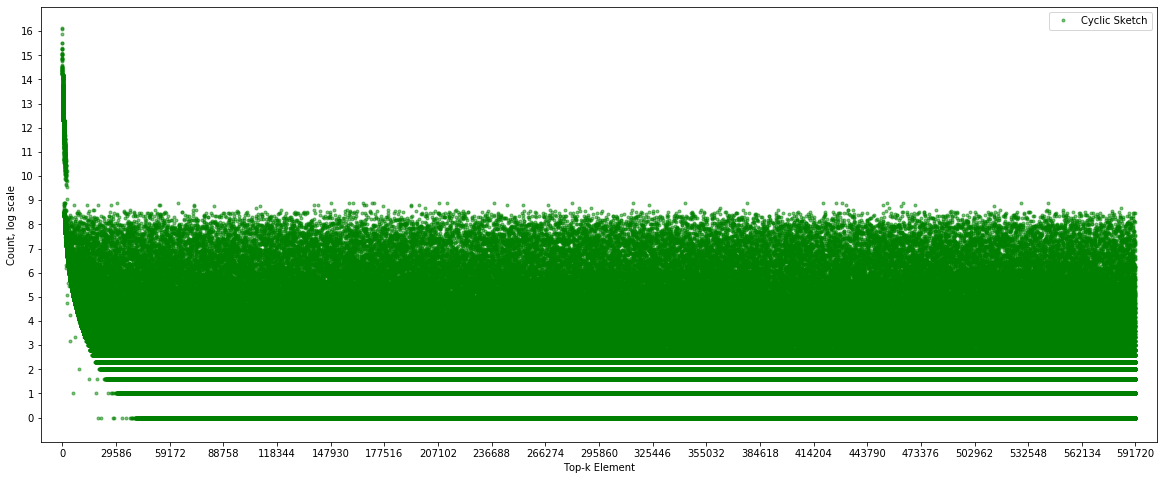

'\nprint(Sk_head)\nmin_ele = min(Top_dict, key=Top_dict.get)\n    # 找dict中的最小key元素\nprint(Top_dict[min_ele])\nfor i in range(len(Sk_head)):\n    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))\n    \n# result to csv\nimport pandas as pd\npath="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)\n\n# Top_dict to csv\nfilename=\'CS_Top_\'+str(size)+\'_\'+dataset+\'.csv\'\ntopdf=pd.DataFrame(Top_dict.items(),columns=[\'Element\',\'Count\'])\ntopdf.to_csv(os.path.join(path,filename),index=False)\n\n# Sketch to csv\nfilename=\'CS_Sketch_\'+str(TC.depth)+\'x\'+str(TC.width)+\'_\'+dataset+\'.csv\'\npd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))       \n'

In [22]:
import sys
sys.path.append("..")

import Tools.Config as TC
import Tools.Func as TF
import Node.DS as DS
import numpy as np
import time
import os
import hyperloglog
import re
from pympler import asizeof

dataset='webdocs'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\webdocs"
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
w=256
d=256
size=1024
topk=1024
if size<topk:
    topk=size
TC.Set_default(w,d,size,topk)
    # set width, depth, size of Sk, random seed of hash
    # Config.width, Config.depth
Sk_head=[DS.Head(0) for j in range(TC.depth)]
Sketch=np.zeros((TC.depth,TC.width),dtype='int32')
hll = hyperloglog.HyperLogLog(0.05)
Top_dict=dict()
e_min=DS.Tail("",0)   

# =============================Stream processing=============================
start=time.time()
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:
                #item_count-=1
                item=DS.Tail(e,1)
                if Top_dict.get(item.ID):
                    # e in Top
                    Top_dict[item.ID]+=1
                else:
                    if len(Top_dict)<TC.size:
                        Top_dict[item.ID]=1
                    else:
                        hll.add(item.ID)
                        TF.UpdateSk(item,Sk_head,Sketch)
            if TC.e_max.count>e_min.count:
                min_ele = min(Top_dict, key=Top_dict.get)
                    # 找dict中的最小key元素
                e_min=DS.Tail(min_ele,Top_dict[min_ele])
                TF.BringBack(e_min,Top_dict,Sk_head,Sketch)
end=time.time()

# =============================Print and Plot result=============================
print("Top-{},Sketch:{}*{}".format(TC.size,TC.depth,TC.width))
print("Execution time:{:8.3f} seconds.".format(end-start))


# Element-Precision
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))
tp_set,precision=TF.Get_precision(gr_path,Top_dict,TC.topk)
    # send default top k
print("Precision: {:6.3f}".format(precision))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk1=asizeof.asizeof(hll)
sk2=asizeof.asizeof(Sk_head)
sk3=asizeof.asizeof(Sketch)
print("Top_dict with {} bytes.".format(sk0))
print("Sketch with {} bytes.".format(sk3))
print("Sk_head with {} bytes.".format(sk2))
print("hyperloglog with {} bytes.".format(sk1))
print("Total size {} kbytes, ".format((sk0+sk1+sk2+sk3)/1024))

# Count ARE/AAE in Top
startx=time.time()
top_are,top_aae=TF.Get_ARE_AAE(gr_path,Top_dict,tp_set)
print("Find:{}".format(len(tp_set)))
#print("{} item found in SS[{}] compare with true Top-{}".format(len(tp_set),Config.size,topk))
endx=time.time()

print("Top_ARE: {:6.4f}".format(top_are))
print("Top_AAE: {:6.4f}".format(top_aae))
print("Estimate time:{:7.3f} seconds.".format(endx-startx)) 
TF.Plot_topk_compare(gr_path,Top_dict,"Cyclic Sketch")

# All element compare
ground_truth=TF.Get_ground_truth(gr_path)

My_result2=dict()
distinct=len(hll)
for item in ground_truth:
    My_result2[item]=TF.Query8(item,Top_dict,Sk_head,Sketch,distinct)
TF.Plot_all_compare(ground_truth,My_result2,"Cyclic Sketch")

'''
print(Sk_head)
min_ele = min(Top_dict, key=Top_dict.get)
    # 找dict中的最小key元素
print(Top_dict[min_ele])
for i in range(len(Sk_head)):
    print(TF.Query8(Sk_head[i].maxID,Top_dict,Sk_head,Sketch,distinct))
    
# result to csv
import pandas as pd
path="..\\result\\CS\\"+dataset+"\\Top_"+str(TC.size)+"_Sk_"+str(TC.depth)+"_"+str(TC.width)

# Top_dict to csv
filename='CS_Top_'+str(size)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
filename='CS_Sketch_'+str(TC.depth)+'x'+str(TC.width)+'_'+dataset+'.csv'
pd.DataFrame(Sketch).to_csv((os.path.join(path,filename)))       
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:'''    

In [32]:
total_count=0
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:
                total_count+=1
topsum=sum(Top_dict.values())
Sketch.shape[0]
temp=0
for i in range(Sketch.shape[0]):
    for j in range(Sketch.shape[1]):
        temp+=Sketch[i][j]
print(temp+topsum)
print(total_count)


EOF
15487894
15487894


In [10]:
import math

for w in range(1,129,):
    result=1-(1+1/w)*math.exp(-1/w)
    print("w={}: {:.3f} %".format(w,result*100))

w=1: 26.424 %
w=2: 9.020 %
w=3: 4.462 %
w=4: 2.650 %
w=5: 1.752 %
w=6: 1.244 %
w=7: 0.928 %
w=8: 0.719 %
w=9: 0.573 %
w=10: 0.468 %
w=11: 0.389 %
w=12: 0.329 %
w=13: 0.281 %
w=14: 0.243 %
w=15: 0.213 %
w=16: 0.187 %
w=17: 0.166 %
w=18: 0.149 %
w=19: 0.134 %
w=20: 0.121 %
w=21: 0.110 %
w=22: 0.100 %
w=23: 0.092 %
w=24: 0.084 %
w=25: 0.078 %
w=26: 0.072 %
w=27: 0.067 %
w=28: 0.062 %
w=29: 0.058 %
w=30: 0.054 %
w=31: 0.051 %
w=32: 0.048 %
w=33: 0.045 %
w=34: 0.042 %
w=35: 0.040 %
w=36: 0.038 %
w=37: 0.036 %
w=38: 0.034 %
w=39: 0.032 %
w=40: 0.031 %
w=41: 0.029 %
w=42: 0.028 %
w=43: 0.027 %
w=44: 0.025 %
w=45: 0.024 %
w=46: 0.023 %
w=47: 0.022 %
w=48: 0.021 %
w=49: 0.021 %
w=50: 0.020 %
w=51: 0.019 %
w=52: 0.018 %
w=53: 0.018 %
w=54: 0.017 %
w=55: 0.016 %
w=56: 0.016 %
w=57: 0.015 %
w=58: 0.015 %
w=59: 0.014 %
w=60: 0.014 %
w=61: 0.013 %
w=62: 0.013 %
w=63: 0.012 %
w=64: 0.012 %
w=65: 0.012 %
w=66: 0.011 %
w=67: 0.011 %
w=68: 0.011 %
w=69: 0.010 %
w=70: 0.010 %
w=71: 0.010 %
w=72: 0.010 %


In [10]:
import math
H=32
#d=8*H
for d in range(H,64*H,H):
    result=1-((1+H/d)*math.exp(-H/d))
    print("d={}H: {:.3f} %".format(d/H,result*100))

d=1.0H: 26.424 %
d=2.0H: 9.020 %
d=3.0H: 4.462 %
d=4.0H: 2.650 %
d=5.0H: 1.752 %
d=6.0H: 1.244 %
d=7.0H: 0.928 %
d=8.0H: 0.719 %
d=9.0H: 0.573 %
d=10.0H: 0.468 %
d=11.0H: 0.389 %
d=12.0H: 0.329 %
d=13.0H: 0.281 %
d=14.0H: 0.243 %
d=15.0H: 0.213 %
d=16.0H: 0.187 %
d=17.0H: 0.166 %
d=18.0H: 0.149 %
d=19.0H: 0.134 %
d=20.0H: 0.121 %
d=21.0H: 0.110 %
d=22.0H: 0.100 %
d=23.0H: 0.092 %
d=24.0H: 0.084 %
d=25.0H: 0.078 %
d=26.0H: 0.072 %
d=27.0H: 0.067 %
d=28.0H: 0.062 %
d=29.0H: 0.058 %
d=30.0H: 0.054 %
d=31.0H: 0.051 %
d=32.0H: 0.048 %
d=33.0H: 0.045 %
d=34.0H: 0.042 %
d=35.0H: 0.040 %
d=36.0H: 0.038 %
d=37.0H: 0.036 %
d=38.0H: 0.034 %
d=39.0H: 0.032 %
d=40.0H: 0.031 %
d=41.0H: 0.029 %
d=42.0H: 0.028 %
d=43.0H: 0.027 %
d=44.0H: 0.025 %
d=45.0H: 0.024 %
d=46.0H: 0.023 %
d=47.0H: 0.022 %
d=48.0H: 0.021 %
d=49.0H: 0.021 %
d=50.0H: 0.020 %
d=51.0H: 0.019 %
d=52.0H: 0.018 %
d=53.0H: 0.018 %
d=54.0H: 0.017 %
d=55.0H: 0.016 %
d=56.0H: 0.016 %
d=57.0H: 0.015 %
d=58.0H: 0.015 %
d=59.0H: 0.014 %
d=60.

In [4]:
import math
1-(9/8)*math.exp(-1/8)

0.007190984592330141

In [42]:
# d個substream，共H 個heavy hitters, then 找到True positive的機率
# d 和H的關係
H=5
    # suppose 共100個heavy hitter
for d in range(H,129*H,H):
    print("d={}H, pr(find TP):{:.4f}%".format(d/H,100*d/H*(1-pow((1-1/d),H))))

d=1.0H, pr(find TP):67.2320%
d=2.0H, pr(find TP):81.9020%
d=3.0H, pr(find TP):87.5263%
d=4.0H, pr(find TP):90.4876%
d=5.0H, pr(find TP):92.3137%
d=6.0H, pr(find TP):93.5519%
d=7.0H, pr(find TP):94.4467%
d=8.0H, pr(find TP):95.1234%
d=9.0H, pr(find TP):95.6532%
d=10.0H, pr(find TP):96.0792%
d=11.0H, pr(find TP):96.4292%
d=12.0H, pr(find TP):96.7218%
d=13.0H, pr(find TP):96.9701%
d=14.0H, pr(find TP):97.1834%
d=15.0H, pr(find TP):97.3687%
d=16.0H, pr(find TP):97.5311%
d=17.0H, pr(find TP):97.6746%
d=18.0H, pr(find TP):97.8023%
d=19.0H, pr(find TP):97.9168%
d=20.0H, pr(find TP):98.0199%
d=21.0H, pr(find TP):98.1133%
d=22.0H, pr(find TP):98.1983%
d=23.0H, pr(find TP):98.2759%
d=24.0H, pr(find TP):98.3472%
d=25.0H, pr(find TP):98.4127%
d=26.0H, pr(find TP):98.4733%
d=27.0H, pr(find TP):98.5295%
d=28.0H, pr(find TP):98.5816%
d=29.0H, pr(find TP):98.6302%
d=30.0H, pr(find TP):98.6755%
d=31.0H, pr(find TP):98.7180%
d=32.0H, pr(find TP):98.7578%
d=33.0H, pr(find TP):98.7952%
d=34.0H, pr(find TP

In [21]:
(d/H)*(1-pow((1-1/d),H))

1.0